In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = 0
def sample():
    x = np.random.binomial(size=(2,1), n=1, p= 0.5)
    r = np.bitwise_xor(x[0,:],x[1,:])*1.0
    return x,r
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def d_sigmoid(y):
    return y*(1-y)
def plot_line(w1,w2,b):
    x = np.linspace(-0.5,1.5,100)
    y = -1*(w1/w2)*x-b/w2
    return x,y
def plot_hidden_features(xor):
    global img
    x,y = plot_line(xor.W_z[0,0],xor.W_z[0,1],xor.b_z)
    xor.forward([[0],[0]])
    h0 = xor.h
    xor.forward([[1],[0]])
    h1 = xor.h
    xor.forward([[0],[1]])
    h2 = xor.h
    xor.forward([[1],[1]])
    h3 = xor.h
    plt.figure(figsize=(8,8))
    plt.plot(h0[0,0],h0[1,0],'r*',label='0-0')
    plt.plot(h1[0,0],h1[1,0],'go',label='1-0')
    plt.plot(h2[0,0],h2[1,0],'yo',label='0-1')
    plt.plot(h3[0,0],h3[1,0],'b*',label='1-1')
    plt.plot(x.reshape(-1,1),y.reshape(-1,1),label ='Final Discriminant')
    plt.legend()
    #plt.savefig('h'+ str(img)+'.png')
    plt.show()
    img += 1
def plot_input(xor):
    plt.figure(figsize=(8,8))
    plt.plot(0,0,'r*',label='0-0')
    plt.plot(1,0,'go',label='1-0')
    plt.plot(0,1,'yo',label='0-1')
    plt.plot(1,1,'b*',label='1-1')
    x1,y1 = plot_line(xor.W_h[0,0],xor.W_h[0,1],xor.b_h[0,0])
    x2,y2 = plot_line(xor.W_h[1,0],xor.W_h[1,1],xor.b_h[1,0])
    plt.plot(x1.reshape(-1,1),y1.reshape(-1,1),label='h1 plane')
    plt.plot(x2.reshape(-1,1),y2.reshape(-1,1),label='h2 plane')
    plt.legend()
    #plt.savefig('input'+ str(img)+'.png')
    plt.show()


In [4]:
class nn:
    def __init__(self, hidden_size):
        self.W_h = np.random.rand(hidden_size,2)-0.5
        self.b_h = np.random.rand(hidden_size,1)*0
        self.W_z = np.random.rand(1,hidden_size)-0.5
        self.b_z = np.random.rand(1,1)*0
        self.h = np.zeros((hidden_size,1))
        self.z = 0
        self.x = np.zeros((2,1))
        self.alpha = 1
        self.e = 1
        self.q = 0
        self.m_W_h = np.zeros((hidden_size,2))
        self.m_b_h = np.zeros((hidden_size,1))
        self.m_W_z = np.zeros((1,hidden_size))
        self.m_b_z = 0
    def forward(self,x):
        self.x = x
        self.h = sigmoid(np.dot(self.W_h,self.x) + self.b_h)
        self.z = sigmoid(np.dot(self.W_z,self.h) + self.b_z)
    def error(self,r):
        return -r*np.log(self.z)-(1-r)*np.log(1-self.z)
    def backward(self,r):
        delta_y = self.z - r
        delta_b_z = delta_y
        delta_W_z = delta_y * self.h.T
        delta_h = (delta_y *d_sigmoid(self.h) )* self.W_z.T
        delta_W_h = np.dot(delta_h,self.x.T)
        delta_b_h = delta_h
        self.m_W_h = self.q * self.m_W_h - self.alpha * delta_W_h 
        self.m_b_h = self.q * self.m_b_h - self.alpha * delta_b_h
        self.m_W_z = self.q * self.m_W_z - self.alpha * delta_W_z
        self.m_b_z = self.q * self.m_b_z - self.alpha * delta_b_z
        self.W_h += self.m_W_h
        self.b_h += self.m_b_h
        self.W_z += self.m_W_z
        self.b_z += self.m_b_z
        self.alpha *= self.e
        

In [5]:
def test(size):
    T = 10000
    xor = nn(2)
    error = np.zeros(T-1)
    e = 0;
    for i in range(1,T):
        x,r = sample()
        xor.forward(x)
        xor.backward(r)
        e += xor.error(r)
        error[i-1] = e / i
    return error

In [20]:
T = 10000
xor = nn(2)
error = np.zeros(T-1)
e = 0;
counter = 0

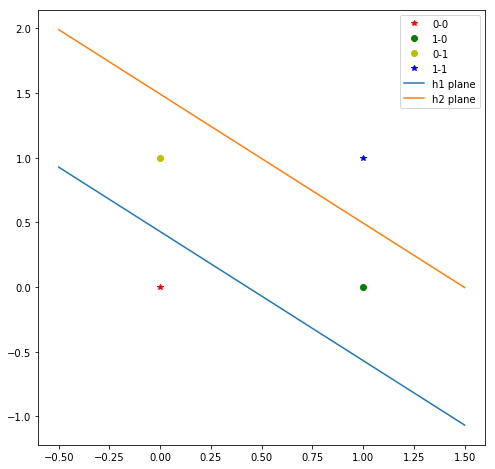

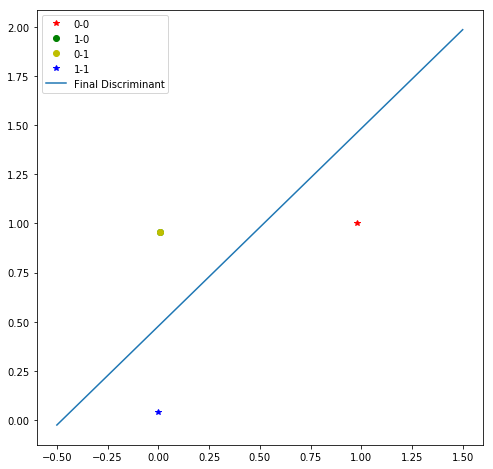

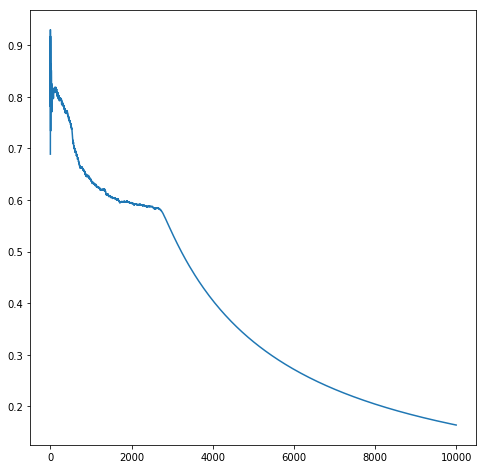

1.0


In [21]:
for i in range(1,T):
    x,r = sample()
    xor.forward(x)
    xor.backward(r)
    e += xor.error(r)
    error[i-1] = e / i
plot_input(xor)
plot_hidden_features(xor)
plt.figure(figsize=(8,8))
plt.plot(error)
plt.show()
acc = 0;
for i in range(100):
    x,r = sample()
    xor.forward(x)
    if np.abs(xor.z-r) < 0.5:
        acc += 1.0
print(acc/100)

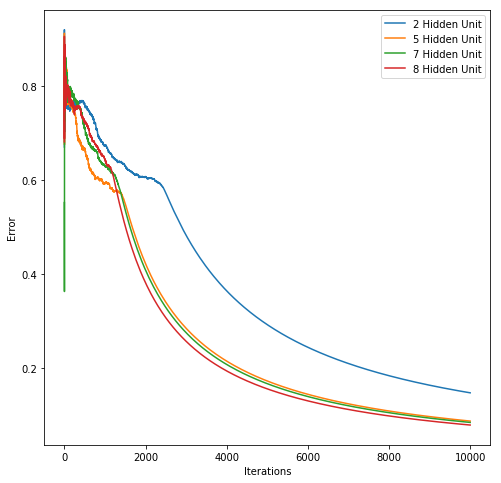

In [22]:
plt.figure(figsize=(8,8))
plt.plot(test(2),label='2 Hidden Unit')
plt.plot(test(5),label='5 Hidden Unit')
plt.plot(test(7),label='7 Hidden Unit')
plt.plot(test(8),label='8 Hidden Unit')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend()
plt.show()

In [23]:
print('W_z: ',xor.W_z)
print('b_z:',xor.b_z)
print('W_h1',xor.W_h[0,:])
print('b_h1:',xor.b_h[0,0])
print('W_h2',xor.W_h[1,:])
print('b_h2:',xor.b_h[1,0])


W_z:  [[-14.62858018  14.54351261]]
b_z: [[-6.94185706]]
W_h1 [-8.88798723 -8.91656216]
b_h1: 3.82138367187
W_h2 [-6.18662495 -6.20721038]
b_h2: 9.25845439539
